# **ИССЛЕДОВАНИЕ РЫНКА ВИДЕОИГР**

**Цель проекта:** выявить закономерности, определяющие успешность компьютерной игры, на основе исторических данных из открытых источников до 2016 г. о продажах игр, оценок пользователей и экспертов, жанров и платформ для планирования рекламной кампании.  

В наборе данных встречается аббревиатура ESRB (Entertainment Software Rating Board) — ассоциации, определяющей возрастной рейтинг компьютерных игр.

**Описание данных**  
•	Name — название игры  
•	Platform — платформа  
•	Year_of_Release — год выпуска  
•	Genre — жанр игры  
•	NA_sales — продажи в Северной Америке (миллионы проданных копий)  
•	EU_sales — продажи в Европе (миллионы проданных копий)  
•	JP_sales — продажи в Японии (миллионы проданных копий)  
•	Other_sales — продажи в других странах (миллионы проданных копий)  
•	Critic_Score — оценка критиков (максимум 100)  
•	User_Score — оценка пользователей (максимум 10)  
•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### ИЗУЧАЕМ ОБЩУЮ ИНФОРМАЦИЮ

#### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st 

pd.set_option('display.max_columns', 35)
pd.set_option("display.float_format", "{:.2f}".format) 

#### Изучение общей информации о данных
Разберем типы данных и количество ненулевых значений

In [2]:
try:
    data=pd.read_csv('/datasets/games.csv')
except FileNotFoundError:
    data-pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
display(data.head(15)) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
display(data.tail(15)) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16700,Mezase!! Tsuri Master DS,DS,2009.00,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.00,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.00,Strategy,0.00,0.01,0.00,0.00,60.00,7.2,E10+
16703,Strawberry Nauts,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16704,Plushees,DS,2008.00,Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E
16705,15 Days,PC,2009.00,Adventure,0.00,0.01,0.00,0.00,63.00,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.00,Shooter,0.01,0.00,0.00,0.00,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.00,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.00,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.describe()  

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


In [7]:
data.isna().sum().sort_values() 

Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     269
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64

Посмотрим на корреляцию данных

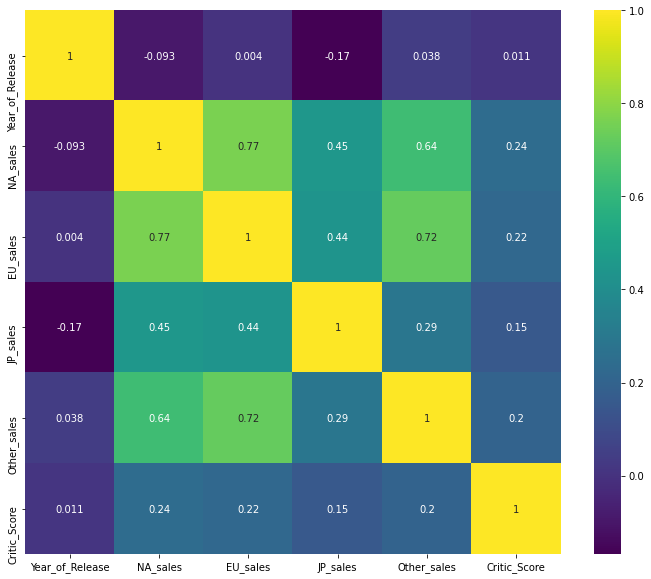

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='viridis', annot=True)
plt.show() 

#### ПЕРВОНАЧАЛЬНЫЕ ВЫВОДЫ

Исходный датасет представляет собой двумерную таблицу, размером (16715, 11) значений.  
Большое количество пропусков в данных по оценке игр экспертами и пользователями, рейтингу. Возможно, причина в том, что рейтинги для самых свежих игр (за 2016 год) ещё не успели сформироваться, а для старых игр нет сформированных рейтингов.  
В данных о годе выпуска 269 пропусков.  
Столбцы с количеством проданных копий содержат много нулевых значений: в данных о продажах в значения 25% и 50% квантилей нулевые или околонулевые. 
С 1990 по 2015 г. резко увеличивается количество выпущенных игр.  
Необходимо детальнее рассмотреть столбцы, принять решение, где обоснованно можно заполнить пропуски, а где оставить, где имеет смысл изменить тип данных, проверить на наличие явных и скрытых дубликатов, поработать с редкими и выбивающимися значениями.

### ПОДГОТОВКА ДАННЫХ

#### Проверим данные на наличие явных дубликатов

In [9]:
print('количество явных дубликатов:', data.duplicated().sum()) 

количество явных дубликатов: 0


#### Приведем названия столбцов к нижнему регистру

In [10]:
data.columns = map(str.lower, data.columns) 

Проверим, что получилось

In [11]:
display(data.head()) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посмотрим, какие платформы представлены в датасете

In [12]:
data['platform'].unique() 

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

####  Работа с пропусками и изменение типов данных

Посмотрим, какие категории рейтинга от организации ESRB есть в данных. 

In [13]:
data['rating'].unique() 

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Аббревиатура для обозначения рейтинга:  

EC - early childhood  
E - everyone  
K-A  - everyone (использовался до 1998 года)  
E10+ - everyone 10 and older  
T - teen  
M-Mature 17+  
AO - adults only 18+  
RP - reiting pending

Пропуски в рейтинге ESRB заменим на аббревиатуру ND - не определен.  
Устаревшую аббревиатуру "K-A" заменим на современное обозначение "E"

In [14]:
data['rating'] = data['rating'].fillna(value='ND')
data['rating'] = data['rating'].replace('K-A', 'E') 

Пропуски в столбцах рейтингов критиков и пользователей оставим без изменений. Вероятно, они связаны с тем, что непопулярные игры не оценивались критиками или не доходили до широких международных рынков, а также с региональными особенностями.

Стобец user_score, кроме числовых значений, содержит NaN и другие значения:

In [15]:
data['user_score'].sort_values(ascending=False).unique() 

array(['tbd', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9',
       '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9',
       '5.8', '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9',
       '4.8', '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9',
       '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9',
       '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9',
       '0.7', '0.6', '0.5', '0.3', '0.2', '0', nan], dtype=object)

Аббревиатура 'tbd' означает "to be defined" - "будет определено позднее". Пока это обозначение считаем пропуском в данных и заменим на NAN

In [16]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan') 

Изменим тип данных столбца на float

In [17]:
data['user_score'] = data['user_score'].astype(float)

В датасете присутствует игры без имени и указания жанра. Таких игр всего две, удалим строки с отсутствующими названиями игр и отсутствующими названиями жанра и перезапишем индексы

In [18]:
data[data['name'].isna()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,ND
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,ND


Удаляем пропуски

In [19]:
data = data.dropna(subset=['name']).reset_index(drop=True) 
data = data.dropna(subset=['genre']).reset_index(drop=True) 

У 269 игр не указан год выпуска, это 1,6% всего объема данных. Оптимальным решением будет их удалить.

In [20]:
data[data['year_of_release'].isna()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.50,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.40,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.90,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,ND
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,ND
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.00,NaN,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.00,6.50,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.00,6.70,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,ND


In [21]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True) 

Изменим тип данных в столбце year_of_release на целочисленный, так как год выпуска не может быть дробным

In [22]:
data['year_of_release'] = data['year_of_release'].astype(int) 

Пропуски в остальных столбцах мы заменять не будем, чтобы не искажать данные.

Для дальнейшего анализа добавим в датасет несколько столбцов. Недостающая информация о производителях и типах игрового устройства взята из источника https://ru.wikipedia.org/wiki/Список_игровых_консолей

#### Добавление столбца с суммарными продажами

Объединим данные о продажах по регионам в один столбец и добавим его в датасет

In [23]:
data['world_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis = 1) 

Добавим данные о типах игрового устройства и компаниях-производителях

напишем функцию для сортировки по типам игровых платформ

In [24]:
def platform_type(platform):
    portative = ['GB', 'DS', 'GBA', '3DS', 'PSV', '3DS']
    stationary = ['Wii', 'NES', 'X360', 'PS', 'PS3', 'PS2', 'SNES', 'PS4', 'N64', 'XB', '2600', 'XOne',
       'WiiU', 'GC', 'GEN', 'SAT', 'NG', 'TG16','3DO', 'PCFX']
    if platform in portative:
        return 'portative'
    elif platform in stationary:
        return 'stationary'
    else:
        return 'PC'        
    
data['platform_type'] = data['platform'].apply(platform_type) 

добавим сортировку по производителям

In [25]:
def company_name(platform):
    companies = {'Atary' : ['2600'], 
                'Bandai' : ['WS'],
                'Microsoft' : ['X360', 'XOne', 'XB'],
                'NEC' : ['TG16', 'PCFX'],
                'Nintendo' : ['N64', '3DS', 'Wii', 'WiiU', 'NES', 'SNES', 'GB', 'GC', 'DS', 'GBA'],
                'Sega' : ['GG', 'GEN', 'SAT', 'DC', 'SCD'],
                'Sony' : ['PS', 'PS2', 'PS3', 'PS4', 'PSV', 'PSP'],
                'Panasonic' : ['3DO'],
                'SNK' : ['NG'],
                'PC' : ['PC']
                }
    for key, value in companies.items():
        if platform in value:
            return key
data['company'] = data['platform'].apply(company_name)        

проверим, что получилось

In [26]:
display(data.sample(10)) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales,platform_type,company
3795,Rival Schools: United By Fate,PS,1998,Fighting,0.12,0.08,0.28,0.03,NaN,NaN,ND,0.51,stationary,Sony
4999,Tobal 2,PS,1997,Fighting,0.00,0.00,0.35,0.02,NaN,NaN,ND,0.37,stationary,Sony
8502,The Walking Dead: Season One,XOne,2014,Adventure,0.08,0.06,0.00,0.01,NaN,NaN,ND,0.15,stationary,Microsoft
1373,Madden NFL 2002,PS,2001,Sports,0.78,0.53,0.00,0.09,88.00,8.00,E,1.40,stationary,Sony
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.00,6.10,T,5.64,stationary,Sony
6167,NBA 2K12,PSP,2011,Sports,0.22,0.03,0.00,0.03,NaN,5.00,E,0.28,PC,Sony
1165,NCAA Football 2002,PS2,2001,Sports,0.77,0.60,0.00,0.20,90.00,8.70,E,1.57,stationary,Sony
2416,The Legendary Starfy,DS,2008,Platform,0.60,0.00,0.20,0.05,75.00,8.40,E,0.85,portative,Nintendo
4011,Tales of Legendia,PS2,2005,Role-Playing,0.07,0.05,0.35,0.02,72.00,7.70,T,0.49,stationary,Sony
2365,GRID,X360,2008,Racing,0.33,0.44,0.01,0.09,87.00,7.90,E,0.87,stationary,Microsoft


In [27]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  world_sales      16444 non-null  float64
 12  platform_type    16444 non-null  object 
 13  company          16444 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 1.8+ MB


#### ВЫВОД

В ходе предобработки имена столюцов приведены к строчному регистру, изменены типы данных в двух столбцах, удалены пропуски в столбцах с названием игры и годом выпуска, а также в датасет добавлены новые столбцы с данными о суммарном объеме продаж, типе и производителе приставок. Эта информация скорее всего поможет для дальнейшего анализа. Из 16715 строк осталось 16444. 

Нулевые значения в данных о продажах решено на данном этапе не удалять и не запонять, так как это может привести к сильному искажению результатов. В подготовке данных на первом этапе анализа мы руководствуемся принципом, что заполнение должно обоснованно повышать качество данных. Если мы понимаем, что у нас нет никаких оснований полагать, что выбран относительно точный способ заполнения, то смысла в таком заполнении нет.

### ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ

#### Построим графики, показывающие количество релизов игр и общего объема продаж в разные годы.

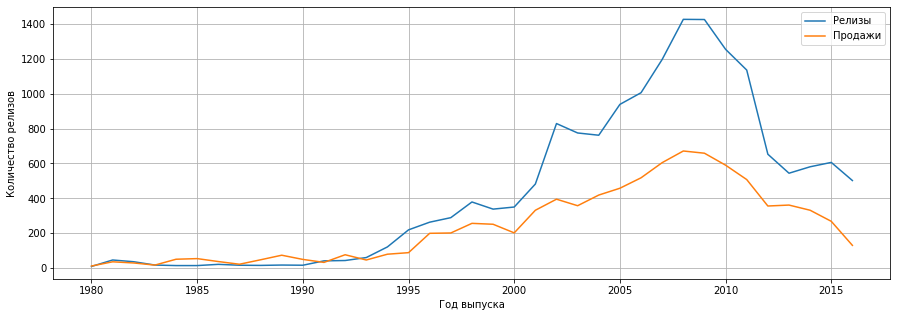

In [28]:
plt.figure(figsize=(15,5))
plt.plot(data.groupby('year_of_release')['name'].count(), label='Релизы')
plt.plot(data.groupby('year_of_release')['world_sales'].sum(), label='Продажи')
plt.grid() 
plt.legend()
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.show()

Мы видим, что ситуация начинает изменяться с 1994-51995 гг. С 2000х годов количество релизов резко возрастает, объем продаж игр в мире растет.

Посмотрим, в какие годы было выпущено наибольшее количество игр

In [29]:
data.groupby('year_of_release')['name'].count().sort_values(ascending=False).head(15) 

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
Name: name, dtype: int64

и в какие годы - наименьшее:

In [30]:
data.groupby('year_of_release')['name'].count().sort_values(ascending=False).tail(15)

year_of_release
1994    121
1993     60
1981     46
1992     43
1991     41
1982     36
1986     21
1989     17
1983     17
1990     16
1987     16
1988     15
1985     14
1984     14
1980      9
Name: name, dtype: int64

До 1994 года количество релизов в год не превышало 100. Эти данные вряд ли стоит учитывать.  
Рост начинается в 1995 году, что, вероятно, вызвано стремительным ростом технологий, удешевлением и распространением гаджетов.  
В 2000-х годах наблюдаем резкий взлет выпуска видеоигр, а в 2008-2009 годах количество релизов достигает максимума - более чем 1400 в год. После 2010 года наблюдается спад, вероятно, вызванный перенасыщением рынка и наступлением финансово-экономического кризиса 2011-12 гг, затронувшего основные страны-производители. 

Посмотрим, как менялось количество выпущенных игр по годам на различных типах игровых платформ.

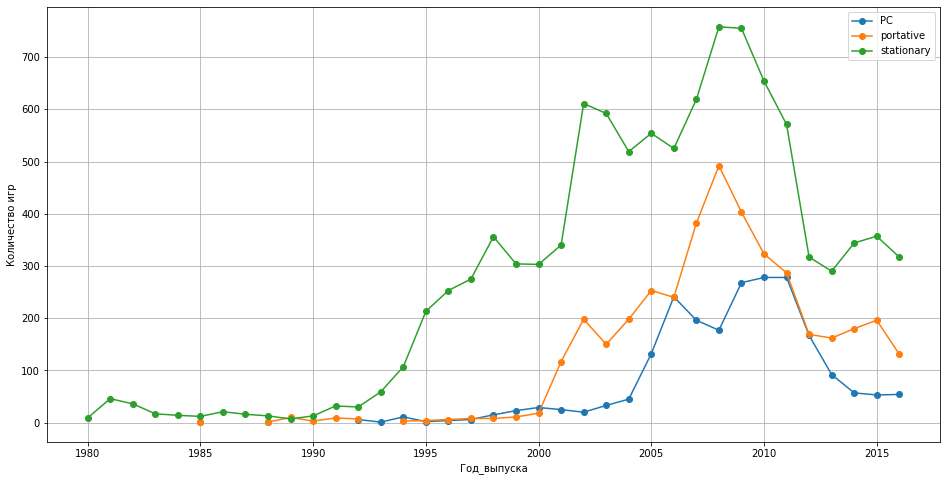

In [31]:
# сводная таблица - количество релизов по годам
platform_type_releases = data.pivot_table(index='platform_type', values = 'name', columns='year_of_release', 
                                             aggfunc='count').T 
# построим график
plt.figure(figsize=(16, 8))
plt.plot(platform_type_releases['PC'], marker ='o', label='PC')
plt.plot(platform_type_releases['portative'], marker ='o', label='portative')
plt.plot(platform_type_releases['stationary'], marker ='o', label='stationary')
plt.xlabel('Год_выпуска')
plt.ylabel('Количество игр')
plt.grid()
plt.legend()
plt.show()

#### Динамика продаж по платформам

Посмотрим, какие платфрмы лидируют по общему количеству продаж

In [32]:
groudep_by_platform = data.pivot_table(index=['platform'],
                                              values='world_sales',
                                              aggfunc='sum') 

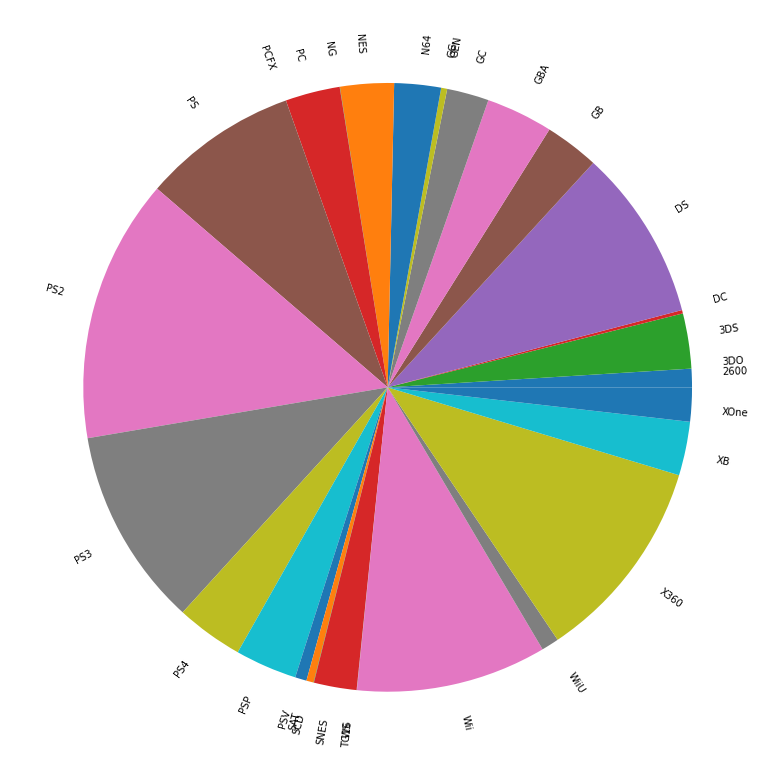

In [33]:
# Круговая диаграмма по платформам
plt.figure(figsize=(30,30))
plt.subplot(121)
plt.pie(
    groudep_by_platform['world_sales'],
    labels=groudep_by_platform.index,
    rotatelabels=True)
plt.show() 

Мы видим, что 6 игровых платформ по общему объему продаж явно лидируют среди остальных. Сгруппируем список игровых платформ по уменьшению объем продаж:

,world_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


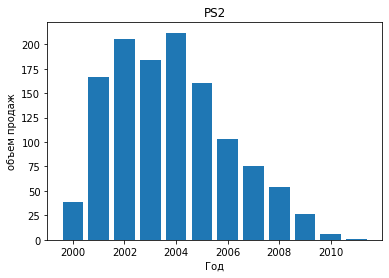

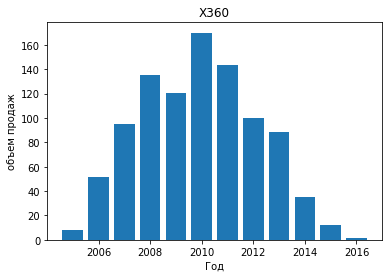

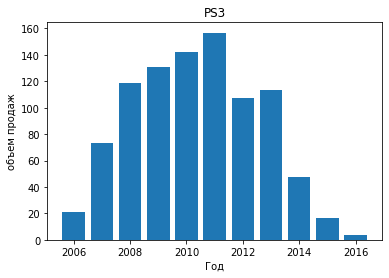

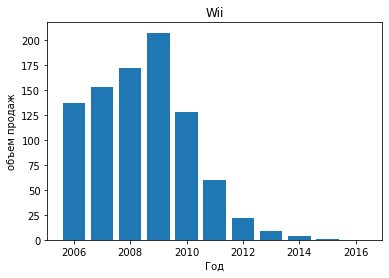

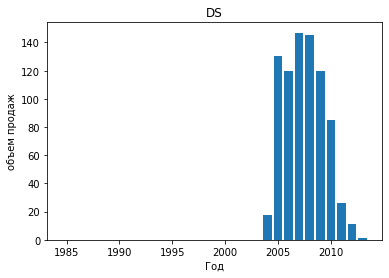

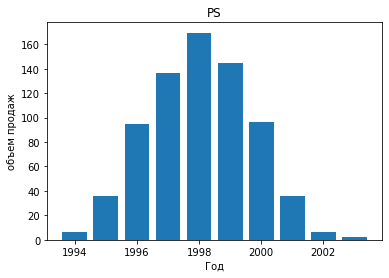

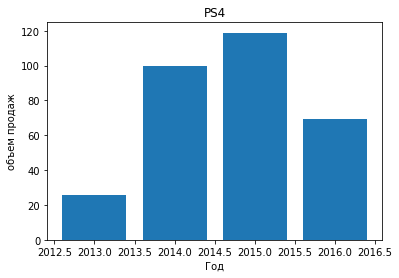

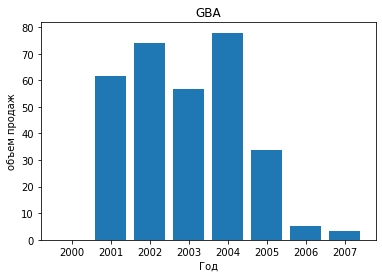

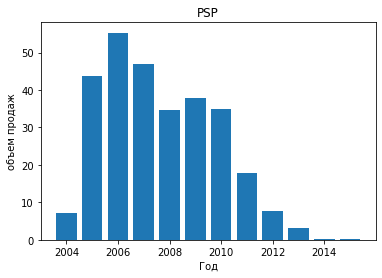

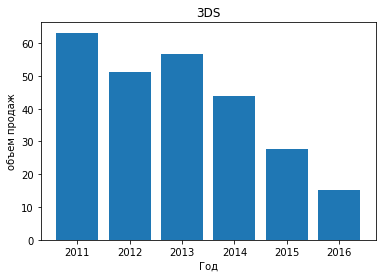

In [34]:
platform_sales = data.pivot_table(index='platform', values='world_sales', aggfunc='sum').\
sort_values('world_sales', ascending=False).head(10)
display(platform_sales)
for i in platform_sales.index:
    x = data.loc[data['platform'] == i].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum')
    plt.bar(x.index, x['world_sales'])
    plt.title(i)
    plt.xlabel('Год')
    plt.ylabel('объем продаж')
    plt.show()

Мы получили список платформ с наибольшими суммарными продажами. Во всех распределениях наблюдается общая закономерность по характерному сроку актуальности игровой плaтформы 6-7 лет.  
Изменение объемов продаж по годам для шестерки топ-платформ:  
PS2 с 2001 по 2007 года  
Х360 с 2006 по 2012 год;  
PS3 c 2007 по 2013 год;  
Wii c 2006 по 2010 год;  
DS с 2005 по 2010 год;  
PS с 1995 по 2001 год.  

#### Определение актуального периода

На основе данных за весь период составим таблицу актуальной "продолжительности жизни" платформы.

In [35]:
act_time = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index() 
# переименуем столбцы для простоты
act_time.columns = ['platform', 'first_year', 'last_year']
act_time['length'] = act_time.last_year - act_time.first_year
display(act_time['length'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])) 

count   31.00
mean     7.61
std      7.00
min      0.00
5%       0.00
25%      3.00
50%      6.00
75%     10.00
95%     20.50
99%     30.10
max     31.00
Name: length, dtype: float64

In [36]:
display(act_time[act_time['length'] >=20.5]) 

,platform,first_year,last_year,length
4,DS,1985,2013,28
13,PC,1985,2016,31


Среднее и медианное значения показывают "срок жизни" 6-7 лет. Среди игровых платформ есть "долгожители", это PC и игровая портативная консоль DS Nintendo.  
Продажи Топ-6 игровых консолей превышают показатели других игровых платформ как минимум в 2 раза.  

Платформа DS выпущена в 2004 году. Странное значение года релиза в 1985 году для этой платфоры считаем выбросом и удаляем, чтобы аномалия не повлияла на расчет среднего срока актуальности платформ

In [37]:
data.drop(data[(data['year_of_release'] < 2004 ) & (data['platform'] == 'DS')].index, inplace=True)

In [38]:
act_time = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index() 
# переименуем столбцы для простоты
act_time.columns = ['platform', 'first_year', 'last_year']
act_time['length'] = act_time.last_year - act_time.first_year
display(act_time['length'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])) 

count   31.00
mean     7.00
std      5.90
min      0.00
5%       0.00
25%      3.00
50%      6.00
75%     10.00
95%     12.00
99%     25.60
max     31.00
Name: length, dtype: float64

In [39]:
display(act_time[act_time['length'] >=12]) 

,platform,first_year,last_year,length
5,GB,1988,2001,13
13,PC,1985,2016,31


Данные соответствуют действительности, выброс удален.

Распределение объема продаж по годам близко к нормальному, соответственно, пик популярности приходится примерно на середину этого срока. Это подтверждается графиками для лидеров продаж.  
Таким образом, нас не интересуют платформы, продаж которых не было в последний год - значительных подъемов продаж вероятнее всего уже не случится. Платформы старше 10 лет не интересны, скорее всего, их продажи в дальнейшем будут крайне низкими.  
Из имеющихся данных, в первую очередь, нужно обращать внимание на игровые консоли не старше 3-х лет. Соеди игровых консолей есть платформа-долгожитель - персональный компьютер, актуальный более 30 лет. Консоли приходят и уходят, а ПК продолжает жить.

Сделаем срез по самым молодым платформам

In [40]:
act_time.query('first_year >= 2012')['platform'] 

18     PS4
27    WiiU
30    XOne
Name: platform, dtype: object

#### Посмотрим на динамику изменения популярности платформ в период с 2012 по 2016 года.

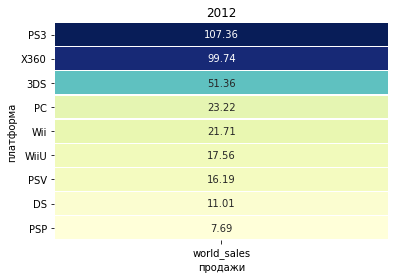

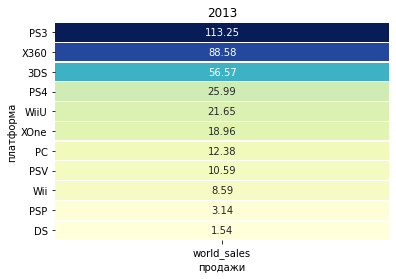

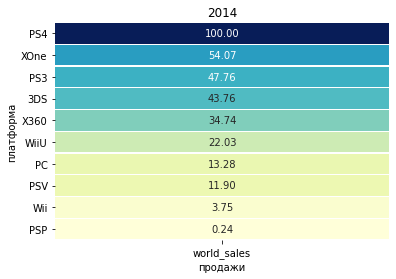

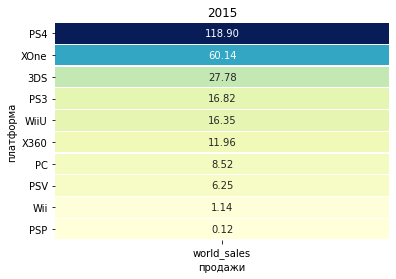

In [41]:
for i in range (2012, 2016):
    act = data.loc[data['year_of_release'] == i].pivot_table(index='platform', 
                                                values='world_sales', aggfunc='sum').sort_values('world_sales', ascending=False)
    plt.figure()
    sns.heatmap(act, annot=True, fmt=".2f", cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
    plt.title(i)
    plt.xlabel('продажи')
    plt.ylabel('платформа')
    plt.show() 

На начало 2016 года PlayStation 4, WiiU, XBox One самые молодые и находятся на подъеме. С 2014 года тройка лидеров меняется, при этом к 2015 году разница в объеме продаж у лидеров в два раза между позициями. Nintendo 3DS, XBox 360, PlayStation 3 и PlayStation Vita миновали пик популярности, Wii и PSP отжили свое, а персональные компьютеры стабильно держатся на плаву.  
Для дальнейшего анализа оставим наиболее перспективные платформы PlayStation 4, WiiU, XBox One и PC, а также еще не лишенную потенциала Nintendo 3DS и будем опираться на данные с 2012 года, когда все платформы, принятые нами как актуальные, уже вышли.

####  Диаграмма размаха по глобальным продажам игр

 По глобальным продажам игр в разбивке за выбранный период построим диаграмму размаха и таблицу:

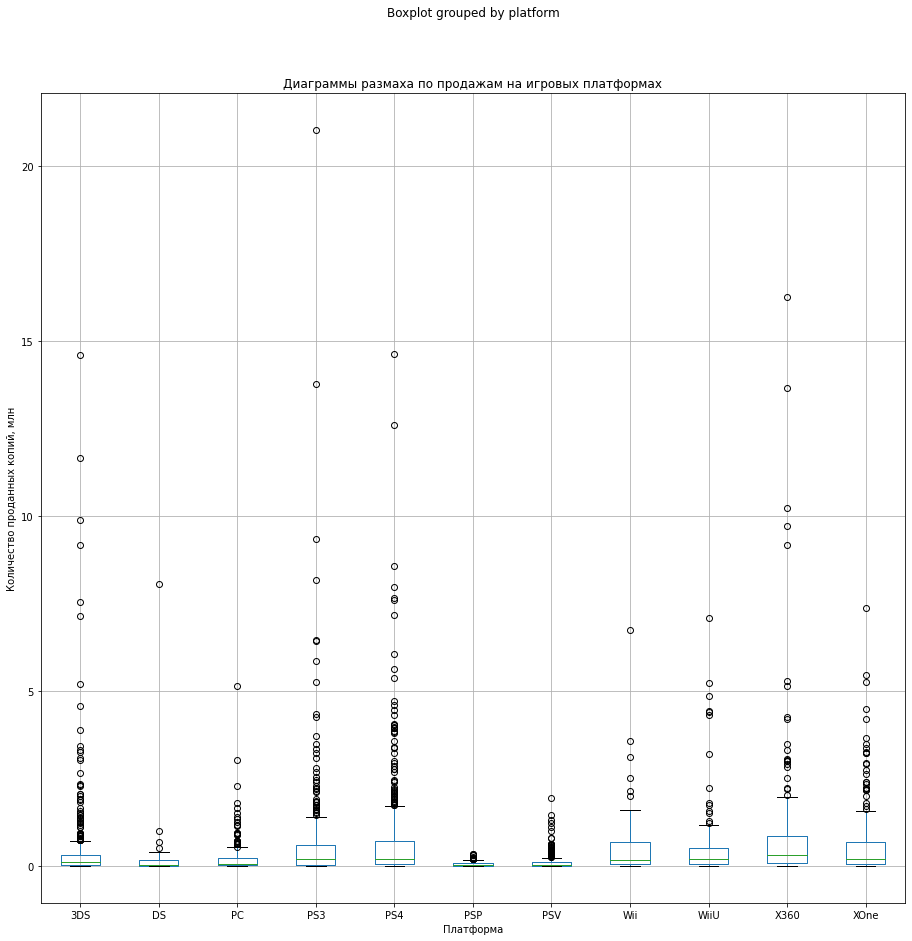

In [43]:
data_actual = data.query('year_of_release >= 2012') 
(data_actual[['platform', 'name', 'world_sales']]
               .boxplot(column='world_sales', by='platform', figsize=(15,15)))
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам на игровых платформах')
plt.show() 

На диаграмме размаха хорошо видны выбросы, которые мы считаем суперпопулярными играми. Сравним 3DS и XOne. У первого маленький ящик и много выбросов. Это говорит о том, что большАя часть объема продаж делается за счет этих выбросов. В то же время у XOne ситуация иная: большой бокс, длинный ус и мало выбросов. Это свидетельствует о том, что на XOne покупают разные игры, причем, в немалом количестве. 

Повторим эту же диаграмму размаха в масштабе, чтобы лучше увидеть медианное и межквартильное расстояние

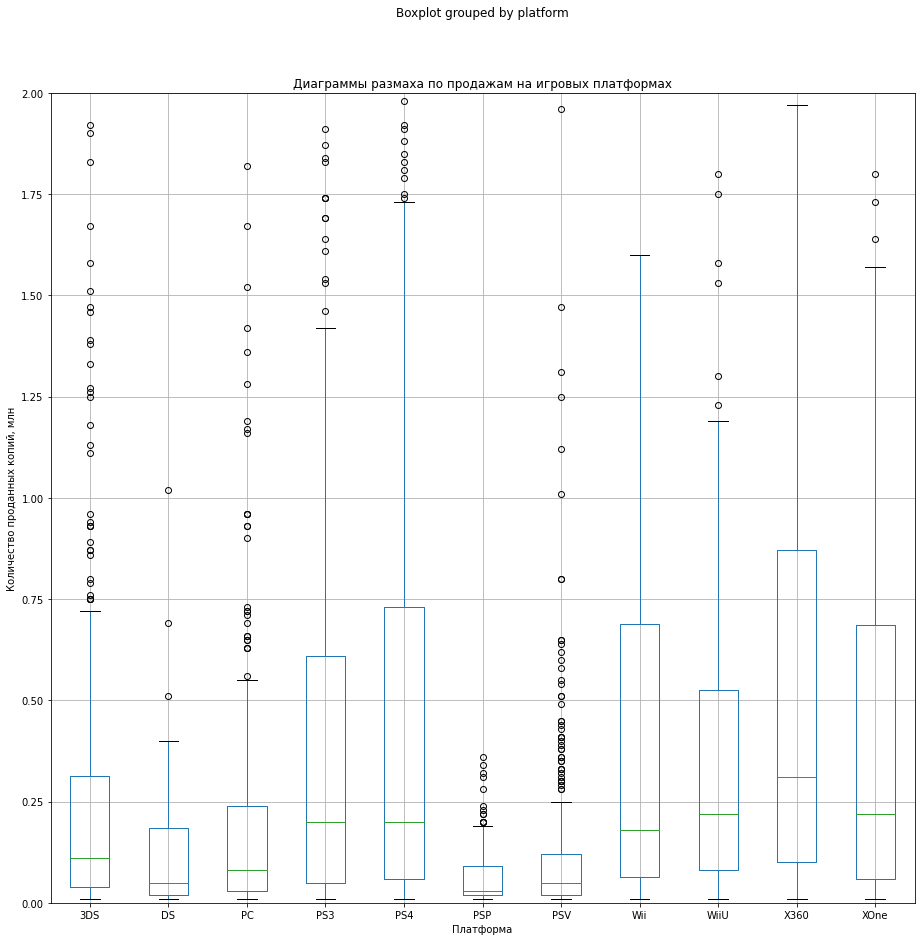

In [44]:
(data_actual[['platform', 'name', 'world_sales']]
               .boxplot(column='world_sales', by='platform', figsize=(15,15)))
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.ylim(0, 2)
plt.title('Диаграммы размаха по продажам на игровых платформах')
plt.show() 

In [45]:
display(data_actual[['platform', 'name', 'world_sales']]
        .pivot_table(index='platform', values='world_sales',\
                                aggfunc=['sum', 'mean', 'median', 'std', 'count'])
        .sort_values(('median', 'world_sales'), ascending=False)) 

,sum,mean,median,std,count
,world_sales,world_sales,world_sales,world_sales,world_sales
platform,,,,,
X360,236.54,0.81,0.31,1.71,292
WiiU,82.19,0.56,0.22,1.06,147
XOne,159.32,0.65,0.22,1.04,247
PS4,314.14,0.80,0.20,1.61,392
PS3,288.79,0.59,0.20,1.46,493
Wii,35.37,0.65,0.18,1.17,54
3DS,194.61,0.49,0.11,1.39,396
PC,62.65,0.25,0.08,0.49,250


Лидером продаж является PlayStation 4, но и размах продаж по годам у нее самый большой - во второй год с момента выпуска ее популярность выросла почти в 2 раза. ПК остается самой стабильной и непопулярной платформой, но и самой стабильной - размах самый узкий. Медианные продажи по каждой из платформ заметно меньше 1 млн, но выбросы на диаграммах и среднее значение числа продаж показывают, что у каждой из платформ есть суперпопулярные игры, приносящие миллионы. Это может быть одна и та же игра, выпущенная в версиях для разных игровых консолей. 

Посмотрим, какие игры и на каких приставках приводили к взлету продаж более 10 млн

In [46]:
 data_actual.query('world_sales > 10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales,platform_type,company
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05,stationary,Sony
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27,stationary,Microsoft
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,ND,14.63,stationary,Sony
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,ND,14.60,portative,Nintendo
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.00,5.30,M,13.79,stationary,Sony
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.00,4.80,M,13.68,stationary,Microsoft
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62,stationary,Sony
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,ND,11.68,portative,Nintendo
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.00,2.60,M,10.24,stationary,Microsoft


GTA V стала многолетним хитом, уже классикой, что видно по продажам и рейтингам. Эта игра регулярно выходила на разных игровых приставках и неизменно приводила к резкому подъему продаж, в том числе - на платформах, которые уже миновали пик популярности. 
Call of Duty - десятая по счёту из серии игр Call of Duty и издаваемая для платформ PC, PS3, Xbox 360, PS4, Xbox One и Wii U. Релиз был ожидаемым, но не показал ожидаемых результатов.  
Pokemon X/Pokemon Y, Pokemon Omega Ruby/Pokemon Alpha Sapphire - версии японской ролевой игры, разработанной для портативной игровой системы Nintendo 3DS. Это первая игра шестого поколения серии Pokémon, а также первая игра основной портативной серии.  
Как мы видим на конкретных примерах, всего 3 игры, издаваемые для различных типов платформ и ставшие суперхитами, привели к скачкам мировых продаж более 10 млн

#### ВЛИЯНИЕ ОЦЕНКИ ПОЛЬЗОВАТЕЛЕЙ И КРИТИКОВ НА ПРОДАЖИ

Для примера возьмем самую популярную игровую консоль 2015 г. Sony PlayStation 4

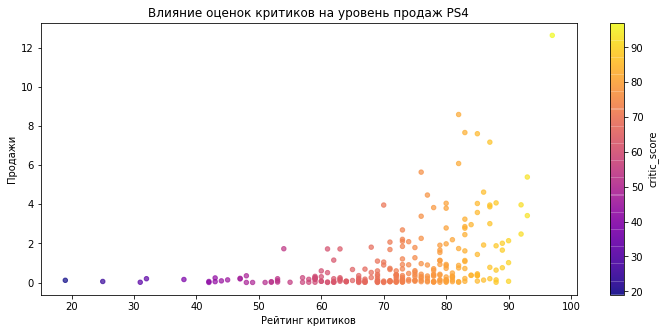

Корреляция между оценкой критиков и продажами: 0.41


In [47]:
data_select = data_actual.query('platform == "PS4"') # отберем данные
data_select.plot.scatter('critic_score',  'world_sales', figsize=(12, 5), alpha=0.7, c='critic_score', colormap='plasma', sharex=False)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на уровень продаж PS4')
plt.show()
print(f'Корреляция между оценкой критиков и продажами: {data_select.critic_score.corr(data_select.world_sales):.2}')

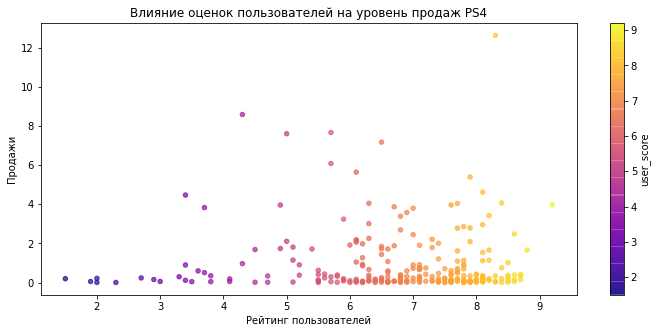

Корреляция между оценкой пользователей и продажами: -0.032


In [48]:
data_select.plot.scatter('user_score', 'world_sales', figsize=(12, 5), alpha=0.7, c='user_score', colormap='plasma', sharex=False)
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на уровень продаж PS4')
plt.show()
print(f'Корреляция между оценкой пользователей и продажами: {data_select.user_score.corr(data_select.world_sales):.2}')


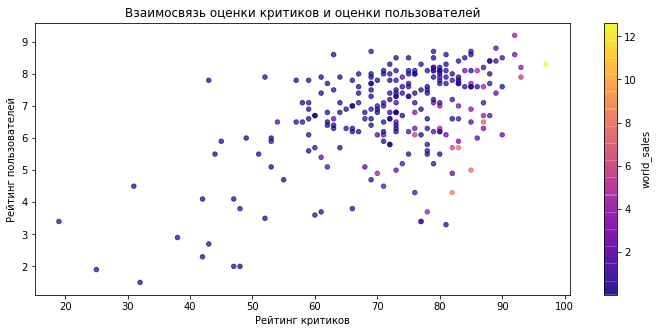

Корреляция между оценкой критиков и оценкой пользователей: 0.56


In [49]:
data_select.plot.scatter('critic_score', 'user_score', figsize=(12, 5), alpha=0.7, c='world_sales', colormap='plasma', sharex=False)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Рейтинг пользователей')
plt.title('Взаимосвязь оценки критиков и оценки пользователей')
plt.show()
print(f'Корреляция между оценкой критиков и оценкой пользователей: {data_select.critic_score.corr(data_select.user_score):.2}')


Распределение ожидаемое, хотя и не линейное. Чем выше оценка критиков, тем выше продажи, линейная корреляция заметна между оценками критиков и продажами, а между продажами и оценками пользователей корреляция умеренная и обратная. Корреляция между оценками критиков и пользователей заметная. Игры с высоким рейтингом у критиков могут иметь средние оценки пользователей.  

Посмотрим, как в целом влияет оценка критиков и пользователей на продажи игровых плaтформ - конкурентов XOne и 3DS

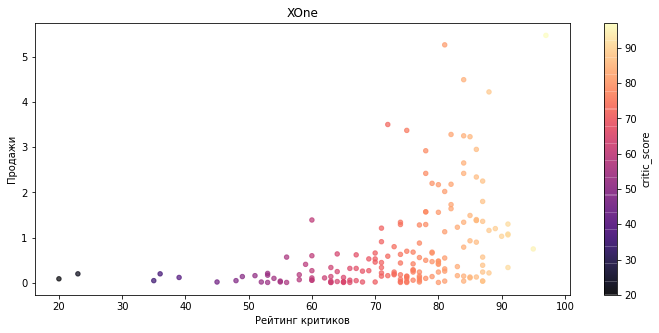

Корреляция между оценкой критиков и продажами: 0.42


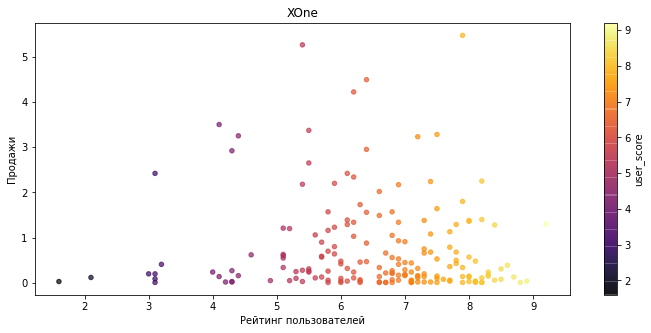

Корреляция между оценкой пользователей и продажами: -0.069


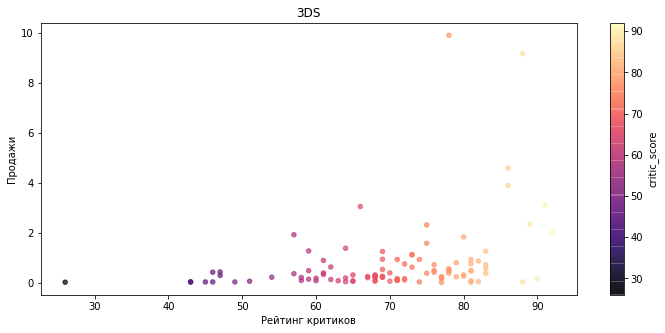

Корреляция между оценкой критиков и продажами: 0.32


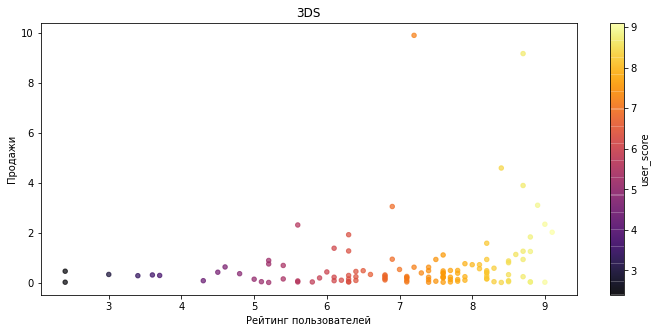

Корреляция между оценкой пользователей и продажами: 0.2


In [50]:
for i in ('XOne', '3DS'):
    act = data_actual.loc[data_actual['platform'] == i]
    act.plot.scatter('critic_score', 'world_sales', figsize=(12, 5), alpha=0.7, c='critic_score',\
                     colormap='magma', sharex=False)
    plt.xlabel('Рейтинг критиков')
    plt.ylabel('Продажи') 
    plt.title(i)
    plt.show()
    print(f'Корреляция между оценкой критиков и продажами: {act.critic_score.corr(act.world_sales):.2}')
    
    act.plot.scatter('user_score', 'world_sales', figsize=(12, 5), alpha=0.7, c='user_score',\
                     colormap='inferno', sharex=False)
    plt.xlabel('Рейтинг пользователей')
    plt.ylabel('Продажи')
    plt.title(i)
    plt.show()
    print(f'Корреляция между оценкой пользователей и продажами: {act.user_score.corr(act.world_sales):.2}')    

Корреляция между оценой критиков и продажами умеренная и для XOne, и для 3DS. А вот значения корреляции между оценкой пользователей и продажами отличается: для XOne наблюдаем слабую обратную, а для 3DS умеренную прямую.  
Можно сделать вывод, что пользователи более непредвзяты в своих оценках, чем критики. Оценки критиков сильнее коррелируют с продажами, однако при прогнозе продаж не следует опираться на оценки критиков, так как существует достаточно примеров, когда игры, получившие высокую оценку критиков, не оправдывали ожиданий по продажам. О связи оценок и продаж трудно говорить и потому, что некоторые игры поставляются эксклюзивно только на одной платформе или игра является частью большой серии, которую ждут и покупают из-за репутации.

#### Жанры игр

Посмотрим, какие жанры наиболее востребованы.

In [51]:
genre_sales = data_actual.pivot_table(index='genre', values='world_sales', columns = 'year_of_release', aggfunc = 'sum', fill_value=0, margins=True).reset_index()
genre_sales = genre_sales[:-1]
genre_sales = genre_sales.rename_axis('index',  axis="columns").set_index('genre').sort_values(by='All', ascending=False)

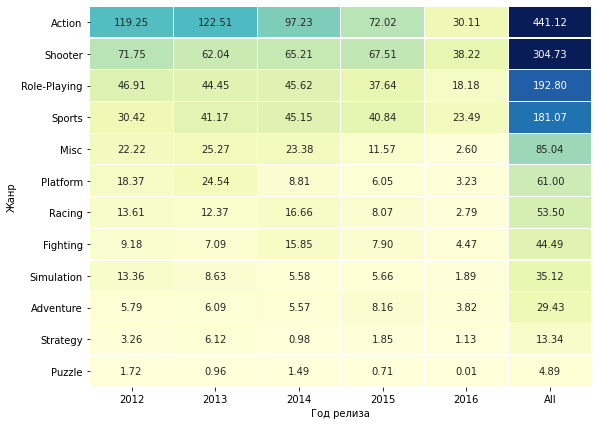

In [52]:
plt.figure(figsize=(9, 7))
sns.heatmap(genre_sales, annot=True, fmt=".2f", cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.xlabel('Год релиза')
plt.ylabel('Жанр')
plt.show() 

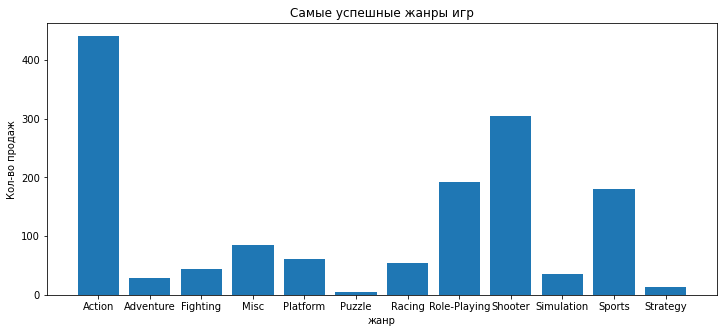

In [53]:
x = data_actual.pivot_table(index='genre', values='world_sales', aggfunc='sum')
plt.figure(figsize=(12, 5))
plt.bar(x.index, x['world_sales'])
plt.title('Самые успешные жанры игр')
plt.xlabel('жанр')
plt.ylabel('Кол-во продаж')
plt.show() 

Самыми популярными жанрами последние 7 лет были и остаются экшен, спортивные игры, шутеры и RPG.  

Построим диаграммы размаха для всех жанров с 2012 года и построим таблицу.

In [54]:
# check
data_actual.platform.unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

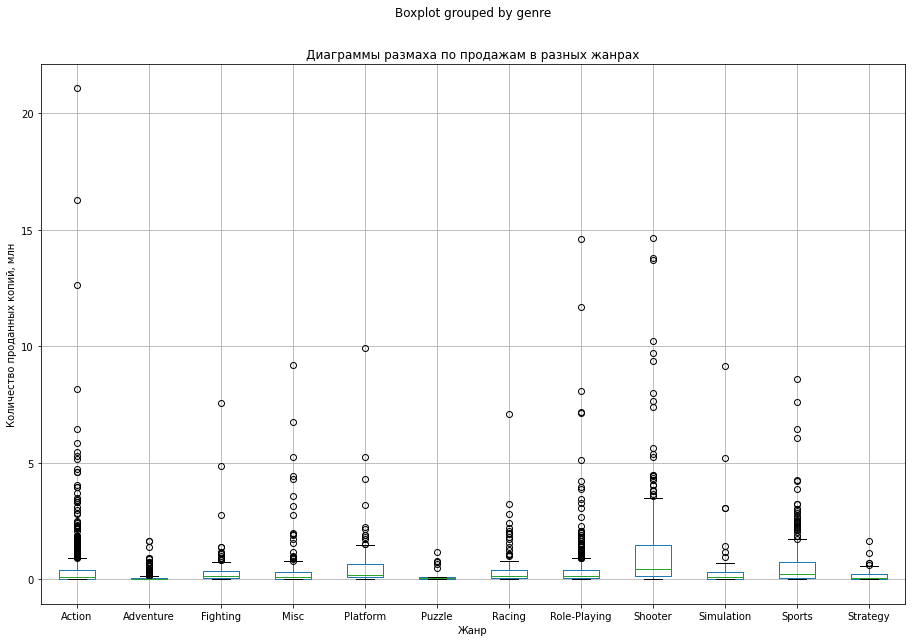

In [55]:
(data_actual[['world_sales', 'genre']].boxplot(column='world_sales', by='genre', figsize=(15,10))
)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.show() 

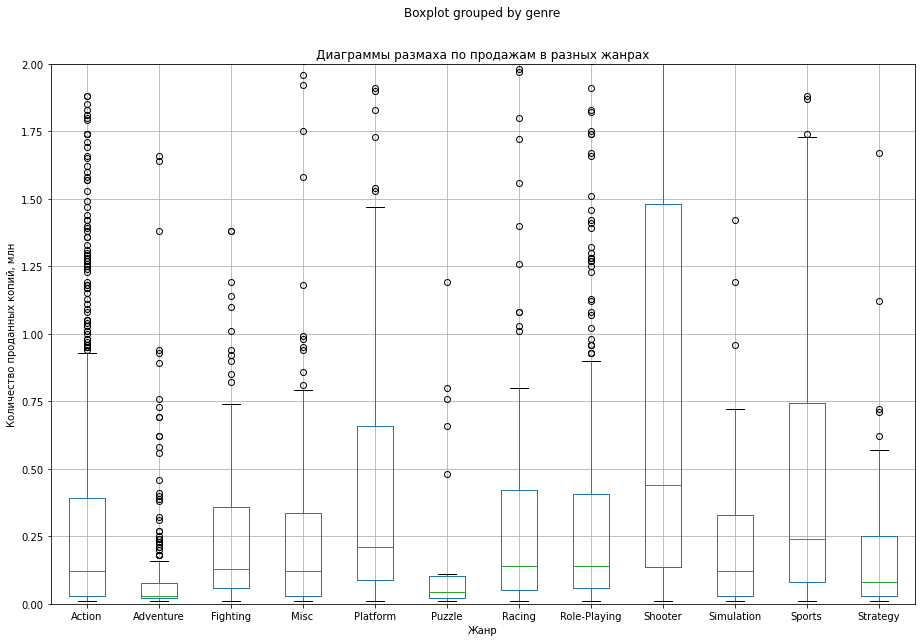

In [56]:
(data_actual[['world_sales', 'genre']].boxplot(column='world_sales', by='genre', figsize=(15,10))
)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.ylim(0, 2)
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.show() 

In [57]:
display(data_actual
        .pivot_table(index='genre', values='world_sales', aggfunc=['sum', 'mean', 'median', 'std', 'count'])
        .reset_index().sort_values(('median', 'world_sales'), ascending=False))

,genre,sum,mean,median,std,count
,,world_sales,world_sales,world_sales,world_sales,world_sales
8,Shooter,304.73,1.30,0.44,2.25,235
10,Sports,181.07,0.68,0.24,1.14,268
4,Platform,61.00,0.72,0.21,1.36,85
7,Role-Playing,192.80,0.52,0.14,1.32,370
6,Racing,53.50,0.47,0.14,0.89,115
2,Fighting,44.49,0.41,0.13,0.91,109
0,Action,441.12,0.43,0.12,1.17,1031
3,Misc,85.04,0.44,0.12,1.08,192
9,Simulation,35.12,0.44,0.12,1.24,80


Из полученных данных видно, что экшны лидеры по количеству релизов и валовым продажам, но по медианым продажам даже не входят в пятерку, шутеры в лидерах и по средним продажам, и по количеству бестселлеров среди выпущенных игр. Спортивные игры также относятся к лидерам, уступая по числу хитов и продаж, но показывая более стабильную картину. 

#### ВЫВОДЫ

Актуальная средняя продолжительность жизненного цикла игровых платформ составляет 7 лет. В 2016 году самыми актуальными платформами являются PS4, WiiU, XOne. Персональные компьютеры занимают не большую, но стабильную нишу. Поэтому игры для PC остаются интересными как стабильный объект продаж. Nintendo 3DS, XBox 360, PlayStation 3 и PlayStation Vita миновали пик популярности, однако не стоит исключать возможность появления игр - суперхитов, которые могут быть выпущены на разных платформах. Такие выпуски приводят к резким скачкам в продажах на разных ипах игровых приставок. 
Оценки критиков и пользователей незначительно влияют на продажи; если принимать их во внимание при прогнозе продаж, имеет смысл учитывать оценки критиков.  
Наиболее популярными жанрами являются спортивные игры, шутеры, платформеры и RPG.

### Различия в регионах и портрет пользователя каждого региона

#### ТОП-платформ

Определим самые популярные платформы для каждого региона. Учитываем данные после 2012 года

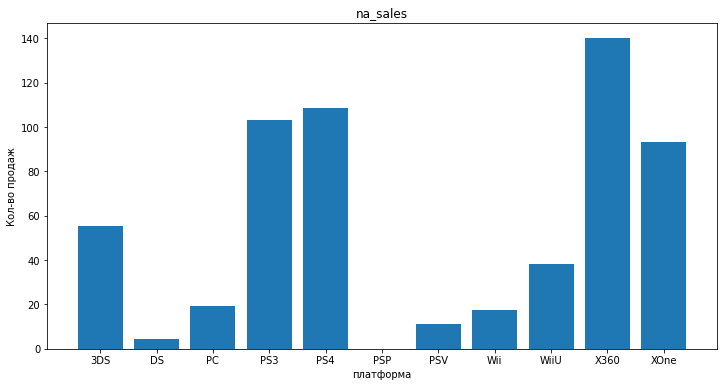

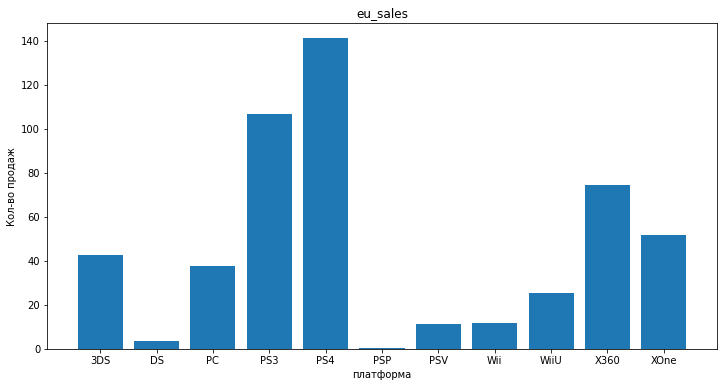

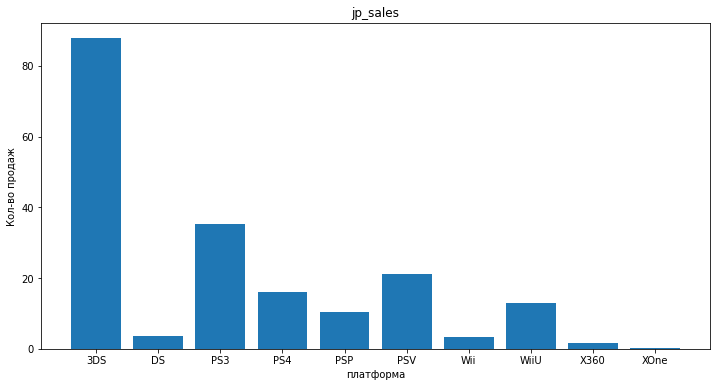

In [58]:
for i in ('na_sales', 'eu_sales', 'jp_sales'):
    x = data_actual.loc[data_actual[i] > 0].pivot_table(index='platform', values=i, aggfunc='sum')
    plt.figure(figsize=(12, 6))
    plt.bar(x.index, x[i])
    plt.title(i)
    plt.xlabel('платформа')
    plt.ylabel('Кол-во продаж')
    plt.show() 

#### ТОП жанров

Определим самые популярные жанры игр в каждом регионе с 2012 года.

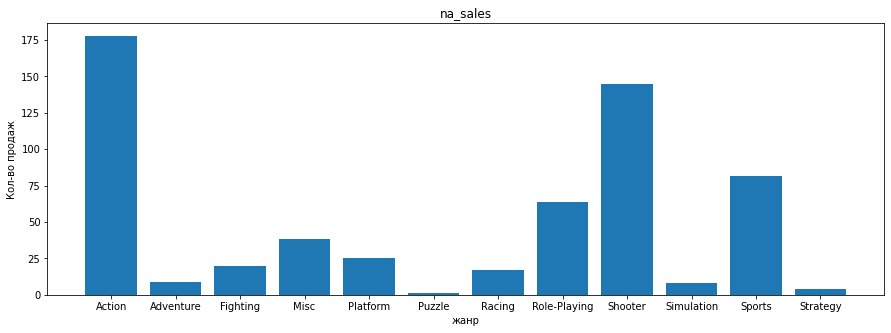

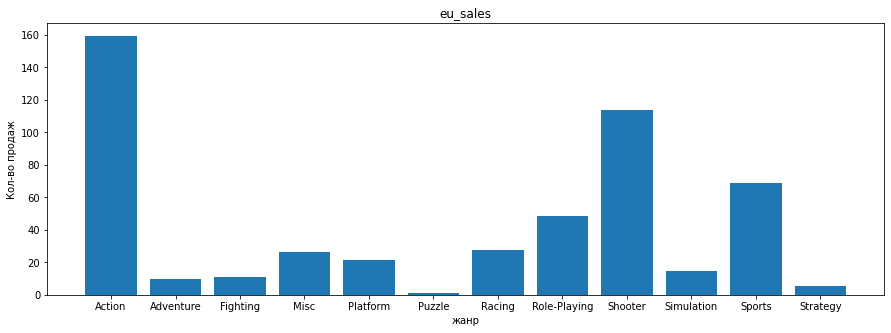

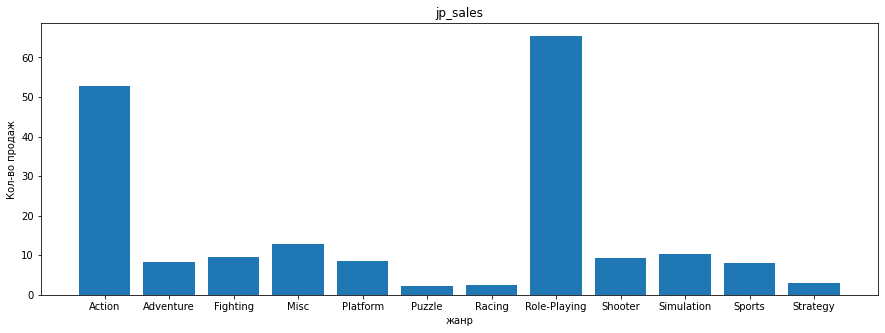

In [59]:
for i in ('na_sales', 'eu_sales', 'jp_sales'):
    x = data_actual.loc[data_actual[i] > 0].pivot_table(index='genre', values=i, aggfunc='sum')
    plt.figure(figsize=(15, 5))
    plt.bar(x.index, x[i])
    plt.title(i)
    plt.xlabel('жанр')
    plt.ylabel('Кол-во продаж')
    plt.show()


Объединим данные по продажам, фирмам-производителям и типам платформ в единую таблицу для каждого региона

In [60]:
data_actual.groupby(['company', 'platform_type', 'platform'])\
[['na_sales', 'eu_sales','jp_sales']].sum().style.background_gradient() 

Вполне ожидаемо, что в Северной Америке и Европе мы наблюдаем похожую картину, а Япония сильно отличается.  
Лидерами среди игровых платформ в США и Европе являются продукты компании Microsoft, X360 и XOne, и продукты компании Sony - PS3, PS4. Первые 4 места занимают стационарные консоли. Более новые модели вытесняют своих предшественников. Между США и Европой есть отличия в распределении лидеров; в Европе 1 и 2 места занимают приставки производства компании Sony; продукты компании Microsoft занимают третье и четвертое место. В США лидером пока остается X360, далее PS4, PS3 и XOne. Однако PS4 набирает популярность и в США. 
В Японии ситуация складывается по-другому. Самая популярная платформа 3DS, далее PS3, PSV. Вероятно, причина такого отличия - в менталитете востока и запада и в том, что в Японии популярны портативные, а не стационарные игровые устройства. Продаж игр для ПК в Японии нет. Также видна разница в предпочтении производителей, Nintendo и Sony японские корпорации.
По жанрам в Америке и Европе лидеры распределились одинаково: Action, Shooter, Sport, RPG. В Японии смамый популярный жанр RPG и чуть мене популярен Action. Эти два жанра в несколько раз популярнее всех остальных.  
Также необходимо учитывать, что на наши выводы оказывает сильное влияние период с 2012 года.

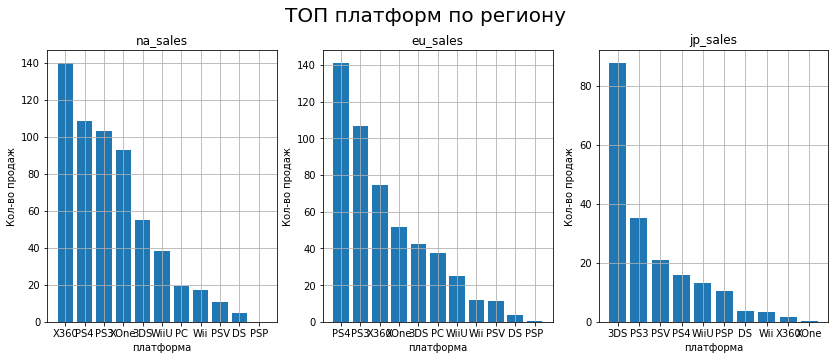

In [61]:
fig, axes = plt.subplots(1, 3)
n=0
for i in ('na_sales', 'eu_sales', 'jp_sales'):
    x = data_actual.loc[data_actual[i] > 0].pivot_table(index='platform', values=i, aggfunc='sum').\
    sort_values(i, ascending=False)
    plt.subplot(1,3,1+n)
    plt.bar(x.index, x[i])
    plt.grid()
    plt.title(i)
    plt.xlabel('платформа')
    plt.ylabel('Кол-во продаж')
    n+=1
fig.suptitle('ТОП платформ по региону', y = 1, fontsize = 20)
fig.set_figheight(5)
fig.set_figwidth(14)
plt.show() 

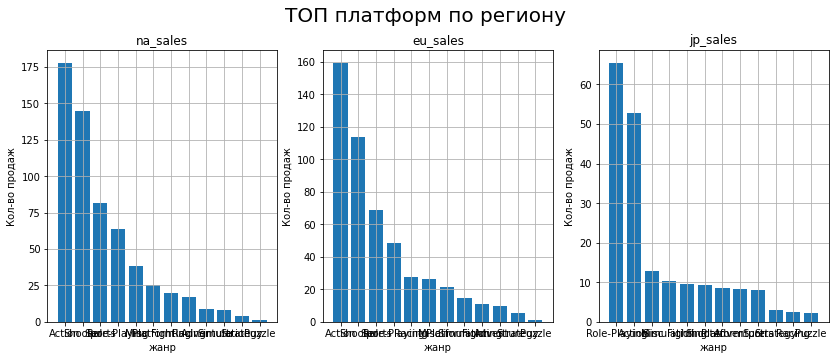

In [62]:
fig, axes = plt.subplots(1, 3)
n=0
for i in ('na_sales', 'eu_sales', 'jp_sales'):
    x = data_actual.loc[data_actual[i] > 0].pivot_table(index='genre', values=i, aggfunc='sum').\
    sort_values(i, ascending=False)
    plt.subplot(1,3,1+n)
    plt.bar(x.index, x[i])
    plt.grid()
    plt.title(i)
    plt.xlabel('жанр')
    plt.ylabel('Кол-во продаж')
    n+=1
fig.suptitle('ТОП платформ по региону', y = 1, fontsize = 20)
fig.set_figheight(5)
fig.set_figwidth(14)
plt.show() 

 #### Влияние рейтинга ESRB

Посмотрим, как влияет рейтинг ESRB на продажи игр в различных регионах.

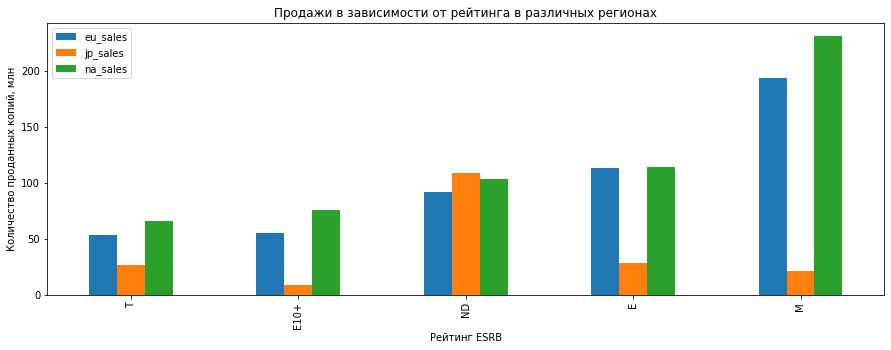

In [63]:
(
    data_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .sort_values(by='na_sales')
    .plot(kind='bar', figsize=(15, 5))
)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество проданных копий, млн')
plt.title('Продажи в зависимости от рейтинга в различных регионах')
plt.show()

Cамые популярные категории для США и Европы совпадают. Больше всего продаж у игр с рейтингом "для взрослых (старше 16 лет)". Далее идут игры для всех, очевидно, потому, что имеют самую широкую аудиторию, затем игры для школьников и подростков. На третьем месте игры с неопределенным рейтингом, их примерно столько же, скользо и игр с рейтиногом "для всех" в Северной Америке и чуть меньше в Европе, больше всего таких игр в Японии, более 100 млн проданных копий.  
Рейтинг ESRB предназначен для рецензирования игр на территории Северной Америки (США, Канады, Мексики). Возможно, иностраным играм рейтинг не присваивается, так как в Японии существует своя аналогичная организация. Либо в Японии наиболее популярны игры без этого рейтинга, созданные в самой Японии. На это указывает и разница в предпочтениях жанров.  

#### ВЫВОДЫ

Региональные особенности сильно влияют и на популярность, и игровых жанров, и игровых платформ.  
В Европе и Северной Америке лидеры отличаются незначительно: наиболее популярны стационарные платформы, XBox 360, XOne, PS3 и PS4.  
В Японии наиболее популярны мобильные консоли Nintendo 3DS и PlayStation Vita. Из стационарных консолей популярны PS3 и PS4, но объемы их продаж в несколько раз меньше. По имеющимся данным объем продаж игр для ПК в Японии стремится к нулю.  
Из жанров в Европе и Северной Америке лидируют экшен, спортивные игры и шутеры. В Японии лидеруют RPG, экшн занимает второе место и эти жанры намного опережают остальные по популярности.  
Разница в рынках (восточный и западный) наталкивает на мысль о неслучайности пропусков в данных и том, что весь датасет, по сути, состоит из двух частей, которые правильнее рассматривать по отдельности.

### Проверка гипотез

####  Гипотеза 1

Сравним средние пользовательские рейтинг платформ Xbox One и PC.  
Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны.  
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC отличаются.  

Так, как в данных оценок пользователей много пропусков, значение критического уровня вероятности (альфа) примем равным 5%.

In [64]:
user_score_xbox = data_actual[(data_actual.platform =='XOne') & (data_actual['year_of_release'] > 2013)\
                                                                 & (data_actual.user_score.notna())]['user_score']
user_score_PC = data_actual[(data_actual.platform =='PC') & (data_actual['year_of_release'] > 2013)\
                            & (data_actual.user_score.notna())]['user_score'] 

results = st.ttest_ind(
    user_score_xbox, 
    user_score_PC,  equal_var = False)
alpha = 0.05

print('p-значение:', results.pvalue) 
if results.pvalue < alpha:	
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
display(data_actual.query('platform in ["XOne", "PC"]')
        .pivot_table(index='platform', values='user_score', aggfunc=['mean', 'median'])) 

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


,mean,median
,user_score,user_score
platform,,
PC,6.43,6.80
XOne,6.52,6.80


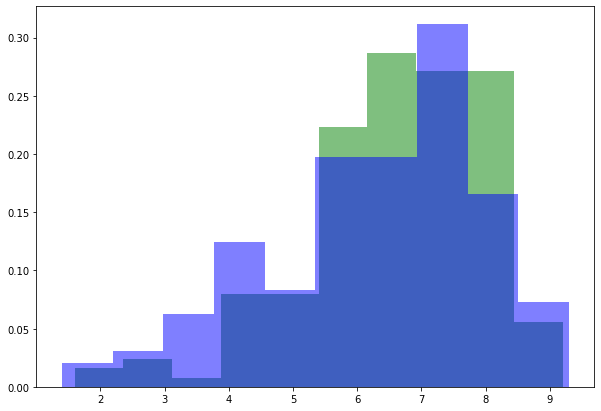

In [65]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(user_score_xbox, bins=10, density=True, alpha=0.5, color='green')
ax.hist(user_score_PC, bins=10, density=True, alpha=0.5, color='blue')
plt.show() 

Согасно полученному р-значению, вероятность, что в данной статистической модели средние пользовательские рейтинги платформ Xbox One и PC окажутся не равны, составляет 11%. Медианные значения пользовательских рейтингов равны, средние значения отличаются на 0,09. Учитывая, что  в данных оценок пользователей много пропусков, и значение критического уровня вероятности принято равным 5%, считаем, что данные не противоречат нулевой гипотезе и не отвергаем её.

In [66]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


#### Гипотеза 2

Проверим, отличаются ли средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»).  
Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action и Sports равны".  
Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports не равны".  
Значение критического уровня вероятности (альфа) примем равным 5%.

In [67]:
user_score_action = data_actual[(data_actual.genre == "Action") & (data_actual.user_score.notna())]['user_score']
user_score_sports = data_actual[(data_actual.genre == "Sports") & (data_actual.user_score.notna())]['user_score']

results = st.ttest_ind(
    user_score_action, 
    user_score_sports,  equal_var = False)
alpha = 0.05

print('p-значение:', results.pvalue) 

if results.pvalue < alpha:	
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
display(data_actual.query('genre in ["Action", "Sports"]')
        .pivot_table(index='genre', values='user_score', aggfunc=['mean', 'median'])) 


p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


,mean,median
,user_score,user_score
genre,,
Action,6.83,7.10
Sports,5.46,5.70


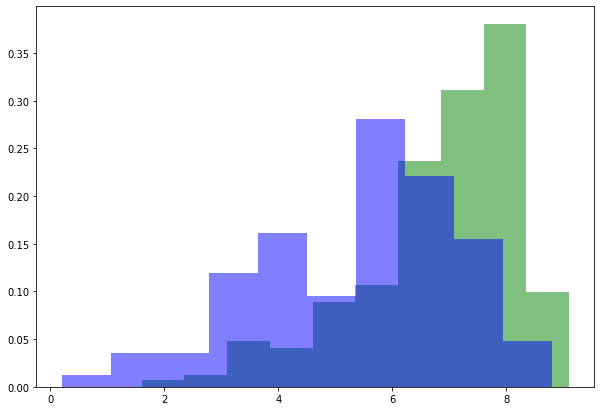

In [68]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(user_score_action, bins=10, density=True, alpha=0.5, color='green')
ax.hist(user_score_sports, bins=10, density=True, alpha=0.5, color='blue')
plt.show() 


Наглядно подтвердаем, что оценки пользователей этих жанров отличаются. Мы получили значение p-value, стремящееся к нулю. Вероятность того, что средние пользовательские рейтинги жанров Action и Sports равны, крайне низкая. Наглядно подтвердаем, что оценки пользователей этих жанров отличаются.

#### ВЫВОДЫ

При формировании нулевых гипотез мы исходим из утверждения, что пользовательские рейтинги равны.  
Для проверки гипотез мы использовали стандартный t-тест и получили следующие значения p-value: 
1. Исходя из того, что мы получили p-value равным 0.11, мы принимаем нулевую гипотезу и считаем, что пользовательские рейтинги для Xbox One и PC равны. 
2. Так, как значение p-value получилось почти равным 0, мы отвергаем нулевую гипотезу и считаем, что средние пользовательские рейтинги  игр в жанре Action и игр в жанре Sports, отличаются, и вероятность получить такие ищё более выраженные различия составляет почти 0%.

На основании принятого нами значения критического уровня статистической значимости 5% мы принимаем, что оценки пользователей не зависят от игровой платформы, но зависят от жанра игры. 

### ОБЩИЙ ВЫВОД

Мы изучили выборку данных о видеоиграх, вышедших с 1980 по 2016 годы на различных игровых платформах - стационарных и портативных консолях и персональных компьютерах.  
На основании этих данных мы выяснили, что средняя продолжительность востребованности консоли соствляет 6-7 лет, поэтому при прогнозе кампании на 2017 год мы рассматривали период с 2012 года. Мы можем прогнозировать, какие игры могут хорошо продаваться в 2017 году и составили портреты пользователей разных регионов.  
К 2016 году PlayStation 4, WiiU, XBox One находятся на подъеме и скорее всего будут актуальны; Nintendo 3DS, XBox 360, PlayStation 3 и PlayStation Vita миновали пик популярности, но еще не исчерпали свой резерв. Мы все равно учитываем эти игровые платформы, так как периодически появляются суперпопулярные игры, выпускаемые для разных платформ. Такие суперхиты приводят к резкому скачку продаж. Также стоит учитывать, что игры для PC показывают небольшой, но стабильный объем продаж.  
Среди жанров наиболее продаваемыми являются спортивные игры, шутеры и RPG и платформеры. Игры в жанре Экшн не дают стабильной картины. В этом жанре периодически появляются суперхиты, приводящие к резкому увеличению общих продаж, но стабильно выскокие продажи это жанр не гарантирует.  
Региональные отличия сильно проявляются как в выборе пользователями игровых платформ, так и жанров. Пользовательские предпочтения в Северной Америке и Европе схожи между собой, а Япония заметно отличается. Так, наиболее популярными платформами в Северной Америке и Европе являются стационарные консоли, и четыре самых популярных модели -  XBox 360, XOne, PlayStation 3 и PlayStation 4. В Японии наиболе популярны портативные консоли и с большим отрывом лидирует мобильная консоль - Nintendo 3DS. На втором месте  стационарная консоль PlayStation3, но объемы ее продаж более, чем в два раза ниже.  
Среди жанров в Европе и Америке наиболее популярны экшн, спортивные игры и шутеры. В Японии из жанров игр наиболее популярен RPG, экшен только на втором месте. Продажи игр в этих жанрах более, чем в пять раз превосходят все остальные.  
Так, как рейтинг ESRB предназначен для рецензирования игр на территории Северной Америки (США, Канады, Мексики), его влияние заметно в Северной Америке и Европе. В Японии популярны игры, не имеющие этого рейтинга - судя по всему, это игры, созданные в самой Японии. Продажи игр сильнее коррелируют с оценкой критиков, чем с оценками пользователей, однако при прогнозе продаж не следует опираться на оценки критиков, так как существует достаточно примеров, когда игры, получившие высокую оценку, не оправдывали ожиданий по продажам. О связи оценок и продаж трудно говорить и потому, что некоторые игры выпускаются эксклюзивно на конкретной платформе или игра является частью большой серии, которую ждут и покупают из-за репутации. К тому же взаимосвязь может иметь не линейный, более сложный характер и зависеть от дополнительных факторов, которые необхлимо учитывать.  
Оценки пользователей зависят не от платформы, а от жанра игры. Возможно пользователи более критичны к играм, чем критики, но мы не сможем оценить, какие именно действия повлияли на рост продаж в рамках нашего проекта, так как имеем ограниченный объем данных. 